### Import Modules

In [110]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Part 1: Load the image and guess the transformation

Firstly, we load and plot the image:

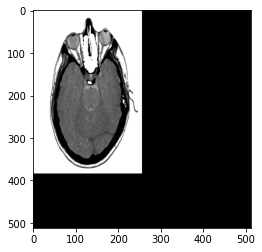

In [111]:
img = cv2.imread('transformed.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)
plt.show()

It is clear that a **scaling** transformation has been applied to the image because the orientation of the image has not been changed but the size of the image has been changed. The scaling is applied without removing the unneeded pixels.

### Part 2: Scaling the image to the original size and add padding

before scaling the image to its original size, lets find the last white pixel in the image to calculate the scaling factors:

In [112]:
last_white = (0, 0)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i][j] == 255:
            last_white = (i, j)
last_white

(383, 255)

now we can obtain the scaling factors:

In [113]:
scale_x = img.shape[0] / last_white[0]
scale_y = img.shape[1] / last_white[1]
scale_x, scale_y

(1.3368146214099217, 2.007843137254902)

to perform affine transformations, we need a funcion to calculate the matrix multiplication for each pixel in the output image to find the corresponding pixel in the input image:

In [114]:
def affine_transformation(src_image, dest_image, t_matrix):
    '''
    Performs an affine transformation on the dest image to fit the src image.
    :param src_image: source image
    :param dest_image: destination image
    :param t_matrix: transformation matrix
    '''
    for i in range(dest_image.shape[0]):
        for j in range(dest_image.shape[1]):
            x, y, _ = np.matmul(t_matrix, np.array([i, j, 1]))
            # round the result to get the nearest pixel
            x = int(x + 0.5)
            y = int(y + 0.5)
            # check if the pixel is in the image
            if x < src_image.shape[0] and y < src_image.shape[1]:
                dest_image[i][j] = src_image[x][y]
    return dest_image

finally, we can perform the scaling transformation.  

It is important to note that we've implemented the `affine_tranfomation` matrix with inverse mapping approach. So, we need to pass the inverse of our scaling matrix to the function:

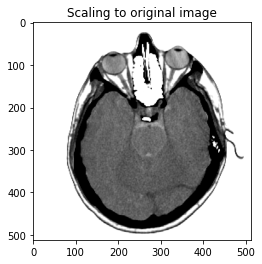

In [115]:
scaling_matrix = np.array([
    [scale_x, 0, 0],
    [0, scale_y, 0],
    [0, 0, 1]
])
inverse_scaling_matrix = np.linalg.inv(scaling_matrix)
dst_image = np.zeros(img.shape, dtype=np.uint8)
dst_image = affine_transformation(img, dst_image, inverse_scaling_matrix)

plt.imshow(dst_image, cmap='gray', vmin = 0, vmax = 255)
plt.title('Scaling to original image')
plt.show();

Finnaly, we can implement the padding:

Padded image shape:  (1024, 1024)


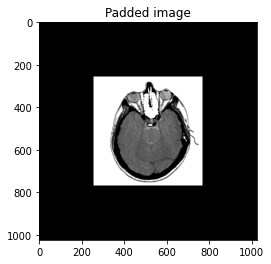

In [116]:
padded_image = np.zeros((dst_image.shape[0] * 2, dst_image.shape[1] * 2), dtype=np.uint8)

start_x = (padded_image.shape[0] - dst_image.shape[0]) // 2
start_y = (padded_image.shape[1] - dst_image.shape[1]) // 2
padded_image[start_x:start_x + dst_image.shape[0], start_y:start_y + dst_image.shape[1]] = dst_image

# showing the image
print('Padded image shape: ', padded_image.shape)
plt.imshow(padded_image, cmap='gray', vmin = 0, vmax = 255)
plt.title('Padded image')
plt.show();

### Part 3: Translation

In this part we need a translation that moves the pixel 100 pixels to up and 250 pixels to right. We use our already implemented affine transformation function to perform the translation.  

It is important to note that we've implemented the `affine_tranfomation` matrix with inverse mapping approach. So, we need to pass the inverse of our translation matrix to the function:

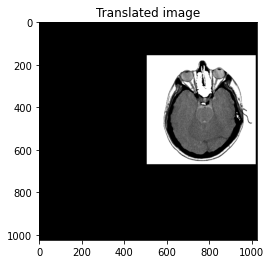

In [117]:
translation_matrix = np.array([
    [1, 0, -100],
    [0, 1, 250],
    [0, 0, 1]
])
inverse_translation_matrix = np.linalg.inv(translation_matrix)
translated_image = np.zeros(padded_image.shape, dtype=np.uint8)
translated_image = affine_transformation(padded_image, translated_image, inverse_translation_matrix)

# showing the image
plt.imshow(translated_image, cmap='gray', vmin = 0, vmax = 255)
plt.title('Translated image')
plt.show();

### Part 4: Shear Transformation

In this section, we implement a shear transformation on image wiht $s_h = -0.3$ and $s_v = 0$.  

It is important to note that we've implemented the `affine_tranfomation` matrix with inverse mapping approach. So, we need to pass the inverse of our shear matrix to the function:

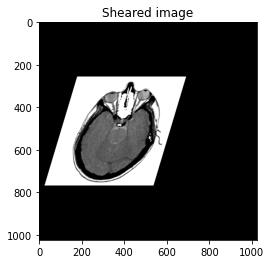

In [118]:
shear_matrix = np.array([
    [1, 0, 0],
    [-0.3, 1, 0],
    [0, 0, 1]
])
inverse_shear_matrix = np.linalg.inv(shear_matrix) # the inverse matrix
sheared_image = np.zeros(padded_image.shape, dtype=np.uint8)
sheared_image = affine_transformation(padded_image, sheared_image, inverse_shear_matrix)

# showing the image
plt.imshow(sheared_image, cmap='gray', vmin = 0, vmax = 255)
plt.title('Sheared image')
plt.show();

### Part 5: Rotation

In this section, we implement a rotation on image with $20^{\circ}$ angle clockwise.  

It is important to note that we've implemented the `affine_tranfomation` matrix with inverse mapping approach. So, we need to pass the inverse of our rotation matrix to the function:

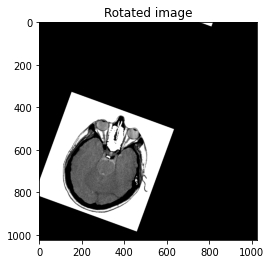

In [124]:
radian = np.deg2rad(-20)
rotation_matrix = np.array([
    [np.cos(radian), -np.sin(radian), 0],
    [np.sin(radian), np.cos(radian), 0],
    [0, 0, 1]
])
inverse_rotation_matrix = np.linalg.inv(rotation_matrix) # the inverse matrix
rotated_image = np.zeros(padded_image.shape, dtype=np.uint8)
rotated_image = affine_transformation(padded_image, rotated_image, inverse_rotation_matrix)

# showing the image
plt.imshow(rotated_image, cmap='gray', vmin = 0, vmax = 255)
plt.title('Rotated image')
plt.show();